<h2><center>Inhaltsbasierte Bild- und Videoanalyse - SoSe 19</center></h2>
<h1><center>Übungszettel 2</center></h1>
<h2><center>Abgabe: So. 12.05.2018 - 23:59 Uhr</center></h2>

Hinweis: Alle Lösungen sollen in einem IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen. Die Übungszettel sollen in Gruppen von 3 Personen abgegeben werden. Die Datei soll nach folgendem Muster benannt werden: uebung01 {nachname1} {nachname2} {nachname3}.ipynb

Für eine Einleitung in IPython siehe z.B.: http://cs231n.github.io/ipython-tutorial/

## Aufgabe 1 - Farbräume, Farbmodelle (2+1,5+2 Punkte)

#### a) Zu welchem Zweck wurden die Farbmodelle RGB, HSV, HSB, YUV und YCbCr eingeführt und in welchen (technischen oder Anwendungs-)Bereichen werden sie verwendet?

Farbmodell | Zweck | Bereich
:-- | :-- | :--
RGB   | representation und anzeige von Bildern  | TV, Computer und Handy Displays, Projektoren
HSV   | Farbwähler Werkzeuge | Computer Vision und Bildanalyse um Merkmale zu detektieren oder bei der Bildverarbeitung
HSB   | HSB zur specifizierung des Farbtons |  Um Farben zu wählen, benutzt von Künstlern
YCbCr | Bild kompression | JPEG, video, Gesichtserkennung, digitales TV

#### b) Geben Sie für die Farbmodelle RGB, HSV, YCbCr jeweils die Kodierung für Magenta, Pink und ein mittleres Grau an.

<table border="1" width=100%>
<tr>
<th>Farbmodell</th>
<th bgcolor="#FF00FF">Magenta</th>
<th bgcolor="#FF7F7F">Pink</th>
<th bgcolor="#808080">Mittleres Grau</th>
</tr>
<tr>
<td>RGB</td>
<td>255, 0, 255</td>
<td>255, 192, 203</td>
<td>105, 105, 105</td>
</tr>
<tr>
<td>HSV</td>
<td>300°, 100%, 100%</td>
<td>350°, 24.7%, 100% </td>
<td>0°, 0%, 41.2%</td>
</tr>
<tr>
<td>YC<sub>b</sub>C<sub>r</sub></td>
<td>105, 212, 235 </td>
<td>212, 123, 159</td>
<td>105, 128, 128</td>
</tr>
</table>

In [5]:
import numpy as np
def rgb2ycbcr(rgb_arr):
    A = np.array([[0.299, 0.587, 0.114], [-0.169, -0.331, 0.500],[0.500, -0.419, -0.081]])
    return np.array([0, 128, 128]) + np.dot(A, rgb_arr)
print(rgb2ycbcr([105, 105, 105]))

[105. 128. 128.]


#### c) Setzen Sie Transformationsmatrizen für die Umwandlung aus dem YUV in den YCbCr Farbraum und umgekehrt auf. 

\begin{equation}
\begin{pmatrix}
Y \\
C_b \\
C_r 
\end{pmatrix} 
= 
\begin{pmatrix}
0.299 & 0.587 & 0.114\\
-0.169 & -0.331 & 0.500\\
0.500 & -0.419 & -0.081
\end{pmatrix} \cdot
\begin{pmatrix}
R \\
G \\
B 
\end{pmatrix}
\\
\begin{pmatrix}
R \\
G \\
B 
\end{pmatrix} 
= 
\begin{pmatrix}
1.000 & 0.000 & 1.140\\
1.000 & -0.395 & -0.581\\
1.000 & 2.032 & 0.000
\end{pmatrix} \cdot
\begin{pmatrix}
Y \\
U \\
V 
\end{pmatrix}
\end{equation}
$\ \implies$

\begin{equation}
\begin{pmatrix}
Y \\
C_b \\
C_r 
\end{pmatrix} 
= 
\begin{pmatrix}
0.299 & 0.587 & 0.114\\
-0.169 & -0.331 & 0.500\\
0.500 & -0.419 & -0.081
\end{pmatrix} \cdot
\begin{pmatrix}
1.000 & 0.000 & 1.140\\
1.000 & -0.395 & -0.581\\
1.000 & 2.032 & 0.000
\end{pmatrix}
\begin{pmatrix}
Y \\
U \\
V 
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
Y \\
C_b \\
C_r 
\end{pmatrix} 
= 
\begin{pmatrix}
1.000 & 0.000 & 0.000\\
0.000 & 1.147 & 0.000\\
0.000 & 0.001 & 0.813
\end{pmatrix}
\begin{pmatrix}
Y \\
U \\
V 
\end{pmatrix}
\end{equation}
\begin{equation}
A=\begin{pmatrix}
1.000 & 0.000 & 0.000\\
0.000 & 1.147 & 0.000\\
0.000 & 0.001 & 0.813
\end{pmatrix}, A^{-1}=\begin{pmatrix}
1.000 & 0.000 & 0.000\\
0.000 & 0.872 & 0.000\\
0.000 & 0.001 & 1.230
\end{pmatrix} 
\end{equation}


## Aufgabe 2 - Evaluation (3+0,5+1+1,5+1,5+1+1 Punkte)
#### Gegeben sei ein Modell A, welches vorraussagen soll, mit welcher Wahrscheinlichkeit auf einem gegebenen Bild eine Katze zu sehen ist. Im folgenden werden Arrays mit je 5000 Einträgen geladen. Jeder Eintrag bezieht sich dabei auf ein Bild in einem Datensatz X. Das Array gt_x enthält die korrekten Klassen (groundtruth): 1 für "Katze" und 0 für "keine Katze". Das Array probs_a_x enthält die vom Modell A vorrausgesagten Wahrscheinlichkeiten für "Katze".

In [2]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import pickle as pkl

# Datasets
gt_x, gt_y = pkl.load(open('data.pkl','rb'), encoding='latin1')

# Predictions
probs_a_x, probs_b_x, probs_rand_x, probs_rand_y = pkl.load(open('predictions.pkl','rb'), encoding='latin1')


#### a) Das Modell wird als binärer Klassifikator benutzt. Nehmen Sie dazu an, dass ein Bild als ,,Katze'' klassifiziert wird, wenn das Modell eine Wahrscheinlichkeit $>0.7$ ausgibt. Berechnen Sie zunächt die Werte für _true positives (tp)_, _false positives (fp)_, _true negatives (tn)_ und _false negatives (fn)_. Beurteilen Sie nun die Qualität des binären Klassifikators indem sie die folgenden Gütemaße berechnen: 
- Recall
- Precision
- Accuracy

In [3]:
tp = np.where(gt_x[probs_a_x > 0.7] == 1)[0].size
fp = np.where(gt_x[probs_a_x > 0.7] == 0)[0].size
tn = np.where(gt_x[probs_a_x <= 0.7] == 0)[0].size
fn = np.where(gt_x[probs_a_x <= 0.7] == 1)[0].size

print("tp:", tp, "fp:", fp, "tn:", tn, "fn:", fn)

recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tn + tp) / (tp + fp + fn + tn)

print("recall:", round(recall, 2), "precision:", round(precision, 2), "accuracy:", round(accuracy, 2))


tp: 1898 fp: 32 tn: 2409 fn: 661
recall: 0.74 precision: 0.98 accuracy: 0.86


#### b) Wie könnte ein Modell auf einfache Weise einen Recall von $100\%$ erreichen?

In [4]:
print("Ein Modell C das einfach alle Bilder mit Katze labeld. So hat man keine false negatives.")
probs_c_x = np.full(probs_a_x.shape, 1)

tp_c = np.where(gt_x[probs_c_x > 0.7] == 1)[0].size
fp_c = np.where(gt_x[probs_c_x > 0.7] == 0)[0].size
tn_c = np.where(gt_x[probs_c_x <= 0.7] == 0)[0].size
fn_c = np.where(gt_x[probs_c_x <= 0.7] == 1)[0].size

print("tp_c:", tp_c, "fp_c:", fp_c, "tn_c:", tn_c, "fn_c:", fn_c)

recall_c = tp_c / (tp_c + fn_c)
print("recall_c", recall_c)

Ein Modell C das einfach alle Bilder mit Katze labeld. So hat man keine false negatives.
tp_c: 2559 fp_c: 2441 tn_c: 0 fn_c: 0
recall_c 1.0


#### c) Beschreiben Sie den Vorteil des _F-measure_ und berechnen Sie diesen.

In [5]:
print("F-measure basiert auf recall und precision, so dass ein Modell wie das in b) nicht als gut bewertet \
würde wenn man nur recall betrachtet.")

f1 = 2 * recall * precision / (recall + precision)

print("F1 measure:", round(f1, 2))

F-measure basiert auf recall und precision, so dass ein Modell wie das in b) nicht als gut bewertet würde wenn man nur recall betrachtet.
F1 measure: 0.85


#### d) Die Precision-Recall Kurve ist ein zweidimensionaler Graph, in dem der _Recall_ auf der X-Achse und die _Precision_ auf der Y-Achse abgetragen werden. Mit dieser Kurve kann die Performance eines Klassifizierers visuell beurteilt und ein geeigneter Grenzwert gefunden werden. Plotten Sie die Recall-Precision Kurven von Modell A und B auf Datensatz X und vergleichen sie die Plots. Berechnen Sie auch die _AUC_ (area under curve). *Hinweis:* Sie dürfen die Bibliothek sklearn.metrics benutzen.

Modell A schneidet besser ab als B, recall und precision is höher.
AUC A: 0.98 AUC B: 0.92


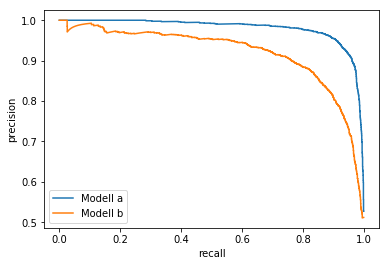

In [7]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

precision_a, recall_a, thresholds_a = precision_recall_curve(gt_x, probs_a_x)
precision_b, recall_b, thresholds_b = precision_recall_curve(gt_x, probs_b_x)

plt.plot(recall_a, precision_a, label="Modell a")
plt.plot(recall_b, precision_b, label="Modell b")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

print("Modell A schneidet besser ab als B, recall und precision is höher.")

auc_a = auc(recall_a, precision_a)
auc_b = auc(recall_b, precision_b)
print("AUC A:", round(auc_a, 2), "AUC B:", round(auc_b, 2))

#### e) Nehmen Sie an, dass das Modell benutzt wird, um dem Benutzer eine Liste von Katzenbildern zu präsentieren. In der Retrieval-Liste werden Katzenbilder weiter oben als solche ohne Katzen zurückgeben. Um die Güte des Retrieval-Ergebnisses zu messen, berechnen Sie die _average_ _precision_ (AP) auf (1) den top-100, (2) top-500 und (3) auf allen Bildern. 

In [285]:
def retrieval_ap(slice_end):
    slice_end = slice_end
    
    # zip to not lose connection
    prob_truth_pairs = zip(probs_a_x, gt_x)

    # sort to get most likely no cat pictures on top
    sorted_probs_a_x = sorted(prob_truth_pairs, key=lambda tup: tup[0])

    # split into two arrays again and slice relevant parts
    rel_probs = np.array([i[0] for i in sorted_probs_a_x])[:slice_end]
    rel_truths = np.array([i[1] for i in sorted_probs_a_x])[:slice_end]

    # pick pictures without cats according to the model
    no_cat_picture_retrieval_list = np.where(rel_probs <= 0.7)

    # check which guesses were correct. Here correct is 0 since we are looking for no cats
    a = 1 - rel_truths[no_cat_picture_retrieval_list]

    ap = sum([np.sum(a[:i+1] / len(a[:i+1])) for i in range(len(a)) if a[i]]) / len(a)
    
    return ap

print("average precision top-100:", round(retrieval_ap(100), 2))
print("average precision top-500:", round(retrieval_ap(500), 2))
print("average precision alle Bilder:", round(retrieval_ap(len(probs_a_x)), 2))

average precision top-100: 1.0
average precision top-500: 0.99
average precision alle Bilder: 0.77


#### f) Betrachten Sie nun einen weiteren Datensatz Y, der ebenfalls Bilder von Katzen enthält. Auch hierfür befinden sich die Groundtruth-Werte im IPython Notebook (gt\_y). Plotten Sie die Verteilungen der Klassen in X und Y. Was fällt auf?

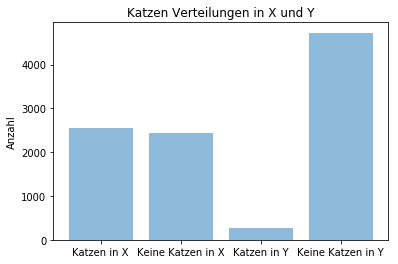

Es sind fast keine Katzen in Y


In [272]:
cat_x, no_cat_x = np.where(gt_x == 1)[0].shape[0], np.where(gt_x == 0)[0].shape[0]
cat_y, no_cat_y = np.where(gt_y == 1)[0].shape[0], np.where(gt_y == 0)[0].shape[0]

labels = ('Katzen in X', 'Keine Katzen in X', 'Katzen in Y', 'Keine Katzen in Y')
y_pos = np.arange(len(labels))
performance = [cat_x, no_cat_x, cat_y, no_cat_y]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Anzahl')
plt.title('Katzen Verteilungen in X und Y')
plt.show()

print("Es sind fast keine Katzen in Y")

#### g) Berechnen Sie die _AP-Werte_ der Ergebnisse (probs\_rand\_x und probs\_rand\_y) eines zufälligen Klassifizierers auf den Datensätzen X und Y. Welchen Einfluss hat die Verteilung der Daten auf die AP? 